<a href="https://colab.research.google.com/github/mashyko/Image-Classifier/blob/master/image_classifier_vgg_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 学習済みVGGモデルを使用した画像識別：PyTorch code

　学習済みのVGGモデルを使用し、未知の画像をImageNetのクラス数（1000）で分類します

 

 パッケージのimportとPyTorchのバージョンを確認

In [1]:
# パッケージのimport
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms


In [2]:
# PyTorchのバージョン確認
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)


PyTorch Version:  1.7.1
Torchvision Version:  0.8.2


# VGG-16の学習済みモデルをロード

In [3]:
# 学習済みのVGG-16モデルをロード
# 初めて実行する際は、学習済みパラメータをダウンロードするため、実行に時間がかかります

# VGG-16モデルのインスタンスを生成
net = models.vgg16(pretrained=True)
net.eval()  # 推論モードに設定

# モデルのネットワーク構成を出力
#print(net)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
# Colabで使用する時は、以下のコメントを外して、実行して下さい。
#!git clone https://github.com/mashyko/Image-Classifier
#%cd Image-Classifier
#!ls images/


# 入力画像の画像分類

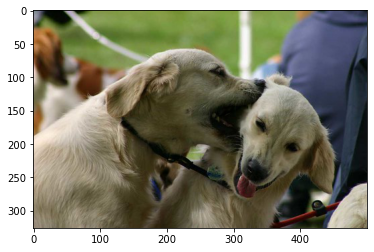

入力画像の予測結果： Labrador_retriever


In [5]:

#  画像読み込み
image_file_path = 'images/289376763_4f2dee00c9.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]

#  元の画像の表示
plt.imshow(img)
plt.show()

# ILSVRCのラベル情報をロードし辞書型変数を生成します
class_index = json.load(open('./data/imagenet_class_index.json', 'r'))


# 前処理の後、バッチサイズの次元を追加する
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = transforms.Compose([
        transforms.Resize(resize),  # 短い辺の長さがresizeの大きさになる
        transforms.CenterCrop(resize),  # 画像中央をresize × resizeで切り取り
        transforms.ToTensor(),  # Torchテンソルに変換
        transforms.Normalize(mean, std)  # 色情報の標準化
        ])
img_transformed = transform(img)  # torch.Size([3, 224, 224])
inputs = img_transformed.unsqueeze_(0)  # torch.Size([1, 3, 224, 224])

# モデルに入力し、モデル出力をラベルに変換する
out = net(inputs)  # torch.Size([1, 1000])
maxid = np.argmax(out.detach().numpy())

result = class_index[str(maxid)][1]

# 予測結果を出力する
print("入力画像の予測結果：", result)


# 以下のセルは上記書籍の元コードです
©︎小川雄太郎『PyTorchによる発展ディープラーニング』

In [6]:
# 入力画像の前処理のクラス
class BaseTransform():
    """
    画像のサイズをリサイズし、色を標準化する。

    Attributes
    ----------
    resize : int
        リサイズ先の画像の大きさ。
    mean : (R, G, B)
        各色チャネルの平均値。
    std : (R, G, B)
        各色チャネルの標準偏差。
    """

    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),  # 短い辺の長さがresizeの大きさになる
            transforms.CenterCrop(resize),  # 画像中央をresize × resizeで切り取り
            transforms.ToTensor(),  # Torchテンソルに変換
            transforms.Normalize(mean, std)  # 色情報の標準化
        ])

    def __call__(self, img):
        return self.base_transform(img)


# 画像データとImageNet 分類ファイルの読み込み

images の中に画像が配置されています。種類が明示されず、番号のみの画像もあります。

In [7]:
!git clone https://github.com/mashyko/Image-Classifier
%cd Image-Classifier
!ls images/

Cloning into 'Image-Classifier'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 149
Receiving objects: 100% (152/152), 7.19 MiB | 5.20 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/Users/koichi/Image-Classifier/Image-Classifier
289376763_4f2dee00c9.jpg flower.jpg               lemon.jpg
Goldenellie.jpg          fotos_labrador.jpg       orange.jpg
cat.jpg                  golden_retriever.jpg     orangutan.jpg
elephant.jpg             labrador4_l.jpg


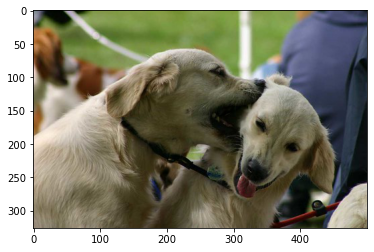

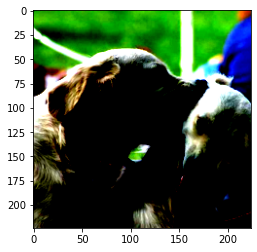

In [8]:
# 画像前処理の動作を確認

# 1. 画像読み込み
image_file_path = 'images/289376763_4f2dee00c9.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]

# 2. 元の画像の表示
plt.imshow(img)
plt.show()

# 3. 画像の前処理と処理済み画像の表示
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)  # torch.Size([3, 224, 224])

# (色、高さ、幅)を (高さ、幅、色)に変換し、0-1に値を制限して表示
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()


# 出力結果からラベルを予測する後処理クラスを作成

In [9]:
# ILSVRCのラベル情報をロードし辞意書型変数を生成します
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))
#ILSVRC_class_index


In [10]:
# 出力結果からラベルを予測する後処理クラス
class ILSVRCPredictor():
    """
    ILSVRCデータに対するモデルの出力からラベルを求める。

    Attributes
    ----------
    class_index : dictionary
            クラスindexとラベル名を対応させた辞書型変数。
    """

    def __init__(self, class_index):
        self.class_index = class_index

    def predict_max(self, out):
        """
        確率最大のILSVRCのラベル名を取得する。

        Parameters
        ----------
        out : torch.Size([1, 1000])
            Netからの出力。

        Returns
        -------
        predicted_label_name : str
            最も予測確率が高いラベルの名前
        """
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]

        return predicted_label_name


# 学習済みVGGモデルで手元の画像を予測

In [11]:
# ILSVRCのラベル情報をロードし辞意書型変数を生成します
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))

# ILSVRCPredictorのインスタンスを生成します
predictor = ILSVRCPredictor(ILSVRC_class_index)

# 入力画像を読み込む
image_file_path = 'images/289376763_4f2dee00c9.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]

# 前処理の後、バッチサイズの次元を追加する
transform = BaseTransform(resize, mean, std)  # 前処理クラス作成
img_transformed = transform(img)  # torch.Size([3, 224, 224])
inputs = img_transformed.unsqueeze_(0)  # torch.Size([1, 3, 224, 224])

# モデルに入力し、モデル出力をラベルに変換する
out = net(inputs)  # torch.Size([1, 1000])
result = predictor.predict_max(out)

# 予測結果を出力する
print("入力画像の予測結果：", result)


入力画像の予測結果： Labrador_retriever


以上